In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Załadowanie danych
df_first = pd.read_csv('population_avg.csv')
df_second = pd.read_csv('fertility_rate.csv')

In [2]:
# Wyświetl pierwsze wiersze tabeli przy użyciu metody head
print("First few rows of df_first:")
print(df_first.head())
print("First few rows of df_second:")
print(df_second.head())

First few rows of df_first:
   Year Average population Live births Deaths Natural change  \
0  1950         36,905,000     844,585  315,3          529,3   
1  1951         37,569,000     858,052  327,5          530,6   
2  1952         38,141,000     846,434  325,7          520,7   
3  1953         38,678,000     795,652  326,8          468,9   
4  1954         39,131,000     845,128  318,5          526,6   

   Crude birth rate (per 1000)  Crude death rate (per 1000)  \
0                          8.5                         14.3   
1                          8.7                         14.1   
2                          8.5                         13.7   
3                          8.4                         12.1   
4                          8.1                         13.5   

   Natural change (per 1000)  Fertility rate  Urban fertility  \
0                       2.81             NaN              NaN   
1                       2.76             NaN              NaN   
2            

In [3]:
# Zdefiniuj liczbę wierszy i kolumn w zbiorze danych (atrybut shape)
print("Shape of df_first:", df_first.shape)
print("Shape of df_second:", df_second.shape)

Shape of df_first: (70, 12)
Shape of df_second: (27, 8)


In [4]:
# Zastąp wartość "-" w tabeli wartością NaN
df_first.replace("-", pd.NA, inplace=True)
df_second.replace("-", pd.NA, inplace=True)

In [5]:
# Zdefiniuj typy wszystkich kolumn za pomocą dataframe.dtypes
print("Data types in df_first:")
print(df_first.dtypes)
print("Data types in df_second:")
print(df_second.dtypes)

Data types in df_first:
Year                             int64
Average population              object
Live births                     object
Deaths                          object
Natural change                  object
Crude birth rate (per 1000)    float64
Crude death rate (per 1000)    float64
Natural change (per 1000)      float64
Fertility rate                 float64
Urban fertility                float64
Rural fertylility              float64
Abortions reported             float64
dtype: object
Data types in df_second:
regions     object
2011        object
2012       float64
2013       float64
2015        object
2017        object
2019        object
2021        object
dtype: object


In [7]:
# Zmień typy kolumn nienumerycznych na numeryczne. 
df_first.replace({',': '.'}, regex=True, inplace=True)

cols_to_convert = ['Live births', 'Deaths', 'Natural change', 'Crude birth rate (per 1000)', 'Crude death rate (per 1000)', 'Natural change (per 1000)']
for col in cols_to_convert:
    df_first[col] = pd.to_numeric(df_first[col], errors='coerce')

for column in df_second.columns[1:]:
    df_second[column] = pd.to_numeric(df_second[column], errors='coerce')

In [8]:
# Oblicz proporcję pustych miejsc w każdej kolumnie (użyj metod isnull i sum)
print("Proportion of missing values in df_first:")
print(df_first.isnull().sum() / len(df_first))
print("Proportion of missing values in df_second:")
print(df_second.isnull().sum() / len(df_second))

Proportion of missing values in df_first:
Year                           0.000000
Average population             0.000000
Live births                    0.000000
Deaths                         0.000000
Natural change                 0.000000
Crude birth rate (per 1000)    0.000000
Crude death rate (per 1000)    0.000000
Natural change (per 1000)      0.000000
Fertility rate                 0.571429
Urban fertility                0.571429
Rural fertylility              0.600000
Abortions reported             1.000000
dtype: float64
Proportion of missing values in df_second:
regions    0.000000
2011       0.037037
2012       0.000000
2013       0.000000
2015       0.148148
2017       0.148148
2019       0.148148
2021       0.407407
dtype: float64


In [10]:
# Zastąp brakujące dane w kolumnach średnimi wartościami tych kolumn (używając metody fillna)
df_first.fillna(df_first.mean(numeric_only=True), inplace=True)
df_second.fillna(df_second.mean(numeric_only=True), inplace=True)

In [11]:
# Uzyskaj listę regionów, w których wskaźnik urodzeń w 2019 r. był wyższy niż średnia dla Ukrainy
mean_2019 = df_second['2019'].mean()
regions_above_mean_2019 = df_second[df_second['2019'] > mean_2019]['regions']
print("Regions with birth rate in 2019 higher than the average for Ukraine:")
print(regions_above_mean_2019)

Regions with birth rate in 2019 higher than the average for Ukraine:
2               Volyn region
6     Transcarpathian region
8     Ivano-Frankivsk region
9                Kyiv region
12               Lviv region
14             Odessa region
16              Rivne region
20            Kherson region
21        Khmelnytsky region
23         Chernivtsi region
25              city of Kyiv
Name: regions, dtype: object


In [13]:
# Który region miał najwyższy wskaźnik urodzeń w 2014 roku?
df_second['2015'] = pd.to_numeric(df_second['2015'], errors='coerce')
max_birth_rate_region_2015 = df_second.loc[df_second['2015'].idxmax()]['regions']
print("Region with the highest birth rate in 2015:", max_birth_rate_region_2015)

Region with the highest birth rate in 2015: Rivne region


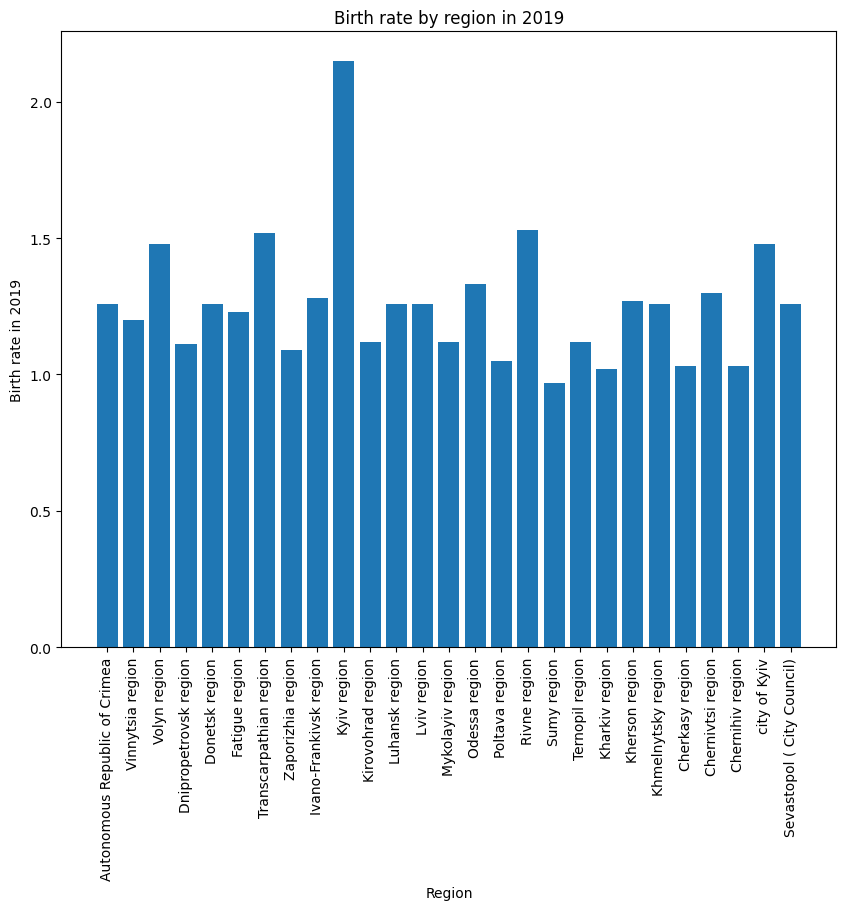

In [14]:
# Zbuduj wykres słupkowy wskaźnika urodzeń według regionów w 2019 r.
plt.figure(figsize=(10, 8))
plt.bar(df_second['regions'], df_second['2019'])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Birth rate in 2019')
plt.title('Birth rate by region in 2019')
plt.show()